# Import libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from deepface import DeepFace as df

In [2]:
#dlib - 68 points
#OpenFace - 
#deepFace - for face identification and allignment

In [3]:
root = "DATASET_2/"

In [4]:
gtfilename = r"C:\Users\swije\OneDrive\Documents\SLIIT\Projects\Datasets\UBFC_DATASET\5-gt\gtdump.xmp"

# Extracting ground truth data

## My method

In [26]:
gtdata = pd.read_csv(gtfilename, header = None)

In [27]:
gtdata.shape

(5223, 4)

In [28]:
gtdata

,0,1,2,3
0,11,68,99,20
1,27,68,99,20
2,43,68,99,20
3,59,68,99,19
4,75,68,99,19
...,...,...,...,...
5218,83937,83,99,40
5219,83953,83,99,38
5220,83969,83,99,36
5221,83985,83,99,33


In [29]:
gt_trace = gtdata[3]
gt_time = gtdata[0] / 1000
gt_hr = gtdata[1]

In [30]:
gt_trace

0       20
1       20
2       20
3       19
4       19
        ..
5218    40
5219    38
5220    36
5221    33
5222    31
Name: 3, Length: 5223, dtype: int64

In [31]:
gt_time

0        0.011
1        0.027
2        0.043
3        0.059
4        0.075
         ...  
5218    83.937
5219    83.953
5220    83.969
5221    83.985
5222    84.001
Name: 0, Length: 5223, dtype: float64

In [32]:
gt_hr

0       68
1       68
2       68
3       68
4       68
        ..
5218    83
5219    83
5220    83
5221    83
5222    83
Name: 1, Length: 5223, dtype: int64

## Copilot - (Better)

In [33]:
gt_data = np.genfromtxt(gtfilename, delimiter=',')

In [34]:
gt_data.shape

(5223, 4)

In [35]:
gt_data

array([[1.1000e+01, 6.8000e+01, 9.9000e+01, 2.0000e+01],
       [2.7000e+01, 6.8000e+01, 9.9000e+01, 2.0000e+01],
       [4.3000e+01, 6.8000e+01, 9.9000e+01, 2.0000e+01],
       ...,
       [8.3969e+04, 8.3000e+01, 9.9000e+01, 3.6000e+01],
       [8.3985e+04, 8.3000e+01, 9.9000e+01, 3.3000e+01],
       [8.4001e+04, 8.3000e+01, 9.9000e+01, 3.1000e+01]])

In [36]:
gt_trace = gt_data[:, 3]
gt_time = gt_data[:, 0] / 1000
gt_hr = gt_data[:, 1]

In [37]:
# normalize data (zero mean and unit variance)
gt_trace = (gt_trace - np.mean(gt_trace)) / np.std(gt_trace)

# Extracting facial frames

In [2]:
# vid_path = r"C:\Users\USER\Documents\SLIIT\Datasets\UBFC_DATASET\5-gt\vid.avi"
vid_path = r"C:\Users\USER\Documents\SLIIT\Datasets\CardioFit AI Dataset\VID_20240428_131859.mp4"

### 1. Method to extract face and save it to a list while simulatanously displaying the extracted frame as a video, but this has a speed issue

In [8]:
#Method to extract face and save it to a list while simulatanously displaying the extracted frame as a video, but this has a speed issue
faces = []
def saveAndShowFaceExtractedVideo(vidPath = "", startingTime = 0, duration = 2) :
    vid_obj = cv2.VideoCapture(vidPath)
    fps = vid_obj.get(cv2.CAP_PROP_FPS)
    print("fps:", fps)
    speed = int(fps) #divide speed to make video faster
    print("speed:", speed)
    startingTime = int(startingTime * fps) #will start after 10 seconds
    displayDuration = int(fps * duration) + startingTime #video will stop after 10 seconds
    
    height = 360
    width = height
    
    n = 0
    while True:
        # track frame index
        n += 1
        
        # read frame by frame
        ret, frame = vid_obj.read()
        if not ret or n > displayDuration:  # limit to 10 seconds
            break
    
        if n < startingTime:
            continue
        
        # perform operations on frame
        detected_face_props = df.extract_faces(
            img_path = frame,
            target_size = (height, width),
        )

        #getting the extracted frame
        frame = cv2.cvtColor(detected_face_props[0]['face'], cv2.COLOR_BGR2RGB)
        # frame  = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) #uncomment this to get different color profile frame
        
        faces.append(frame)
        cv2.imshow('Frame', frame)
        if cv2.waitKey(speed) & 0xFF == ord('q'):
            break
    
    vid_obj.release()
    cv2.destroyAllWindows()

In [11]:
saveAndShowFaceExtractedVideo(vidPath = vid_path, startingTime = 0, duration = 2)

fps: 28.671786
speed: 28


### 2. Extracting Faces from Videos Using Python Deepface Library 
- https://www.daniweb.com/programming/tutorials/540830/extracting-faces-from-videos-using-python-deepface-library

In [96]:
# def get_facial_frames(video_path, startingTime = 0, duration = 2):
#     faces = []
#     cap = cv2.VideoCapture(video_path) # read video file
#     fps = cap.get(cv2.CAP_PROP_FPS)
#     fps = int(fps)
#     # path = os.path.basename(video_path)
    
#     startingTime = int(startingTime * fps) #will start after 10 seconds
#     displayDuration = int(fps * duration) + startingTime #video will stop after 10 seconds

#     i = 0
#     n = 0
#     while cap.isOpened():
#         n += 1
        
#         ret, frame = cap.read()

#         if not ret or n > displayDuration:
#             break

#         if n < startingTime:
#             continue

#         i = i + 1
#         face_props = df.extract_faces(img_path = frame,
#                                            target_size = (224, 224)
#                                            )


#         frame  = cv2.cvtColor(face_props[0]['face'], cv2.COLOR_BGR2RGB)
#         frame  = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


#         confidence = face_props[0]['confidence']
#         if confidence > 0.990:
#             features_dict = {"frames":frame,
#                              "confidence": confidence}
#             faces.append(features_dict)

#         if (i % 10 == 0) and i > 1:
#             print(f"Total frames processed {i}")

#     return faces, fps



# video_frames, fps  = get_facial_frames(vid_path, startingTime = 0, duration = 5)

### 3. Extract facial region and play extracted frames as a video

In [3]:
faces = []

#method to extract face from any video
def extractFace(vidPath = "", startingTime = 0, duration = 2) :
    vid_obj = cv2.VideoCapture(vidPath)
    fps = vid_obj.get(cv2.CAP_PROP_FPS)
    speed = int(fps) #divide speed to make video faster
    startingTime = int(startingTime * fps) #will start after 10 seconds
    displayDuration = int(fps * duration) + startingTime #video will stop after 10 seconds
    
    height = 360
    width = height
    
    n = 0
    while True:
        # track frame index
        n += 1
        
        # read frame by frame
        ret, frame = vid_obj.read()
        if not ret or n > displayDuration:  # limit to 10 seconds
            break
    
        if n < startingTime:
            continue
        
        # perform operations on frame
        detected_face_props = df.extract_faces(
            img_path = frame,
            target_size = (height, width),
        )
        frame = cv2.cvtColor(detected_face_props[0]['face'], cv2.COLOR_BGR2RGB)
        # frame  = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        faces.append(frame)
        # cv2.imshow('Frame', frame)
        # if cv2.waitKey(speed) & 0xFF == ord('q'):
        #     break
    
    vid_obj.release()
    cv2.destroyAllWindows()
    print('done')

In [6]:
#method for playing the extracted frames as video
def playVideo(frames = [], speed = 28):
    for video_frame in frames:
        cv2.imshow('Face', video_frame)
        if cv2.waitKey(speed) & 0xFF == ord('q'):
                break
    cv2.destroyAllWindows()

In [7]:
extractFace(vid_path, startingTime = 0, duration = 10)

done


In [10]:
# method call - THIS WORKS WELL!, NO SPEED ISSUE
playVideo(frames = faces, speed = 30)

### Python OpenCV – Dense optical flow

https://www.geeksforgeeks.org/python-opencv-dense-optical-flow/

Apply dense optical flow to original video and display original and dense optical flow output

In [16]:
# rgbFaces = []
# The video feed is read in as
# a VideoCapture object
cap = cv2.VideoCapture(vid_path)

#first_frame = the first frame in the entire video sequence
ret, first_frame = cap.read()

# Converts frame to grayscale because we only need the luminance channel for detecting edges - less computationally expensive
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

# Creates an image filled with zero intensities with the same dimensions as the frame
mask = np.zeros_like(first_frame)

# Sets image saturation to maximum
mask[..., 1] = 255

fps = cap.get(cv2.CAP_PROP_FPS)
speed = int(fps)
print(speed)
startingTime = int(0 * fps) #will start after 10 seconds
displayDuration = int(fps * 10) + startingTime #video will stop after 10 seconds
height = 360
width = height
n = 0

while(cap.isOpened()):
    n+=1
    ret, frame = cap.read()

    if not ret or n > displayDuration: # limit to 10 seconds
        break
    if n < startingTime:
        continue

    cv2.imshow("input", frame)

    # Converts each frame to grayscale - we previously only converted the first frame to grayscale 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Calculates dense optical flow by Farneback method
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    # Sets image hue according to the optical flow direction
    mask[..., 0] = angle * 180 / np.pi / 2

    # Sets image value according to the optical flow magnitude (normalized) 
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Converts HSV to RGB (BGR) color representation 
    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR) 

    # Opens a new window and displays the output frame 
    cv2.imshow("dense optical flow", rgb) 
    # rgbFaces.append(rgb)

    # Updates previous frame 
    prev_gray = gray 

    # Frames are read by intervals of 1 millisecond. The programs breaks out of the while loop when the user presses the 'q' key 
    if cv2.waitKey(speed) & 0xFF == ord('q'): 
        break

# The following frees up resources and closes all windows 
cap.release()
cv2.destroyAllWindows()
print('done')

30
done


In [ ]:
def applyDenseOpticalFlowToFrames(frames = [], speed = 60):
    for video_frame in frames:
        cv2.imshow('Face', video_frame)
        if cv2.waitKey(speed) & 0xFF == ord('q'):
                break
    cv2.destroyAllWindows()

In [3]:
playVideo(frames = rgbFaces, speed = 28)

NameError: name 'playVideo' is not defined

# DeepFace example

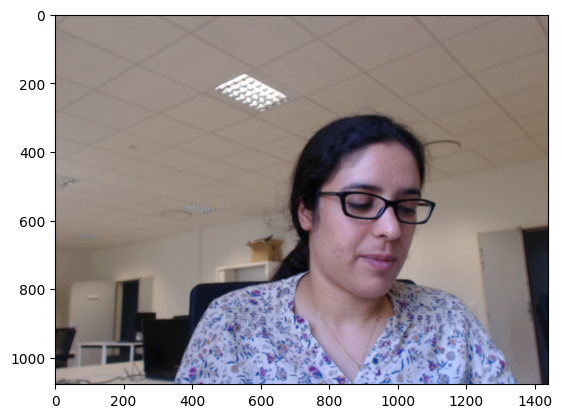

In [41]:
imgPath = r"C:\Users\USER\Documents\SLIIT\Projects\CardioFit-AI Model\Facial Analysis\ubfc_face3.png"
img = cv2.imread(imgPath, -1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

24-05-05 23:06:37 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.


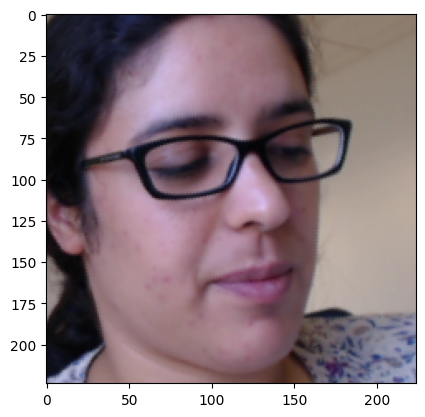

In [42]:
face = df.detectFace(imgPath)
plt.imshow(face)